In [38]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [39]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [42]:
from google.colab import files

In [43]:
uploaded=files.upload()

Saving train.csv to train (1).csv


In [46]:
# loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv('train (1).csv')

In [47]:
news_dataset.shape

(20800, 5)

In [48]:
# print the first 5 rows of the dataframe
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


<ipython-input-49-a96cba65914d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data = news_dataset, palette = 'mako',saturation = 1)


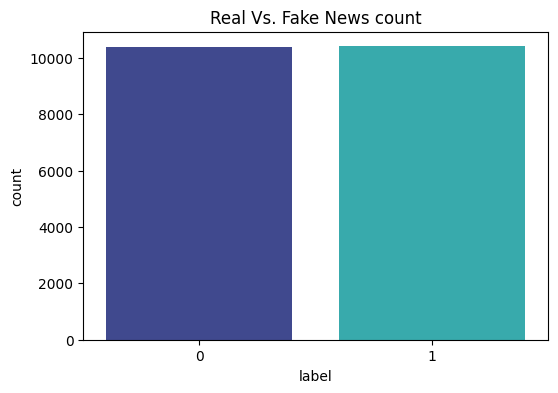

In [49]:
plt.figure(figsize = (6,4))
sns.countplot(x='label', data = news_dataset, palette = 'mako',saturation = 1)
plt.title("Real Vs. Fake News count", fontsize = 12)
plt.show()

In [50]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [51]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [52]:
# merging the author name and news title
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [53]:
# separating the data & label
news_dataset = news_dataset.sample(n=500)
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']
print(X)
print(Y)

          id                                              title  \
7181    7181  An Evolving Sports City, Atlanta Chases a Cham...   
9444    9444  ’No Compromise’: Islamic State Supporters Cele...   
16919  16919  AstraZeneca Pushes to Protect Crestor From Gen...   
2786    2786  Texas House Passes Crackdown Policy on Teacher...   
5902    5902  Life: Inspiring: This Young Girl Still Gets To...   
...      ...                                                ...   
16783  16783  Barbara Boxer Urges Democrats to Follow Meryl ...   
13259  13259  Legacy of Rio Olympics So Far Is Series of Unk...   
11227  11227  Julian Assange Says Trump Won’t Be Allowed To ...   
8902    8902  The WikiLeaks BOMBSHELL That Is Causing Black ...   
4519    4519  The Last-Second Shot: It’s This Tournament’s B...   

                 author                                               text  \
7181        Ben Shpigel  ATLANTA  —   The most arresting vista in town ...   
9444      Allum Bokhari  Islamic State 

In [54]:
port_stem = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content
news_dataset['content'] = news_dataset['content'].apply(stemming)
print(news_dataset['content'])

7181     ben shpigel evolv sport citi atlanta chase cha...
9444     allum bokhari compromis islam state support ce...
16919    andrew pollack astrazeneca push protect cresto...
2786     merril hope texa hous pass crackdown polici te...
5902     life inspir young girl still get dream first f...
                               ...                        
16783    daniel nussbaum barbara boxer urg democrat fol...
13259    anna jean kaiser legaci rio olymp far seri unk...
11227    danni f quest julian assang say trump allow wi...
8902     dsg wikileak bombshel caus black live matter d...
4519     ray glier last second shot tournament buzzer b...
Name: content, Length: 500, dtype: object


In [55]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values
print(X)
print(Y)

['ben shpigel evolv sport citi atlanta chase championship new york time'
 'allum bokhari compromis islam state support celebr london attack social media breitbart'
 'andrew pollack astrazeneca push protect crestor gener competit new york time'
 'merril hope texa hous pass crackdown polici teacher student sex'
 'life inspir young girl still get dream first femal presid'
 'ben kew trump slam media critic refuge visa reform breitbart'
 'alan blinder record show complaint driver deadli tennesse bu crash new york time'
 'michael brenner american foreign polici post trump era'
 'arnaldo rodger wwii airman help veteran heal help leg friend'
 'sam robert dr joy brown long run psychologist airwav die new york time'
 'russia stockpil gold alarm rate next world war fought currenc'
 'aaron kesel wikileak suggest sander possibl plant threaten mook'
 'thoma william ph pope franci muslim terror exist breitbart'
 'guest sting concert par shoot soon'
 'awr hawkin concern mount earthquak hit border brei

In [56]:
Y.shape

(500,)

In [57]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)
print(X)

  (0, 2469)	0.124675754696864
  (0, 2248)	0.12239347369586616
  (0, 2091)	0.33739055481444485
  (0, 2032)	0.35975084185901
  (0, 1518)	0.12020190372331148
  (0, 754)	0.35975084185901
  (0, 392)	0.33739055481444485
  (0, 363)	0.35975084185901
  (0, 352)	0.35975084185901
  (0, 192)	0.28330051549792234
  (0, 133)	0.35975084185901
  (1, 2164)	0.2607498041580985
  (1, 2106)	0.23421313211479783
  (1, 2064)	0.3388845075657679
  (1, 1406)	0.2607498041580985
  (1, 1315)	0.291284493947032
  (1, 1129)	0.2668684670521699
  (1, 442)	0.3388845075657679
  (1, 343)	0.3178211659903327
  (1, 261)	0.15724586193263093
  (1, 235)	0.3388845075657679
  (1, 136)	0.2607498041580985
  (1, 62)	0.3388845075657679
  (2, 2469)	0.12605833633225538
  (2, 2248)	0.12375074616183276
  :	:
  (497, 403)	0.19760616332963593
  (497, 128)	0.32497883367093394
  (497, 61)	0.30969758507214107
  (498, 2436)	0.2810801217996709
  (498, 2402)	0.2756284159758579
  (498, 1388)	0.34994690562624325
  (498, 1306)	0.31029915206228714
  (

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)
print(Y_test)

[1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0
 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0
 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1]


In [63]:
#RANDOM FOREST
#WITH PYTHON_PACKAGE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
rfc_pred=rfc.predict(X_test)
print(classification_report(Y_test,rfc_pred))


              precision    recall  f1-score   support

           0       1.00      0.82      0.90        49
           1       0.85      1.00      0.92        51

    accuracy                           0.91       100
   macro avg       0.93      0.91      0.91       100
weighted avg       0.92      0.91      0.91       100



Confusion Matrix:
 [[40  9]
 [ 0 51]]


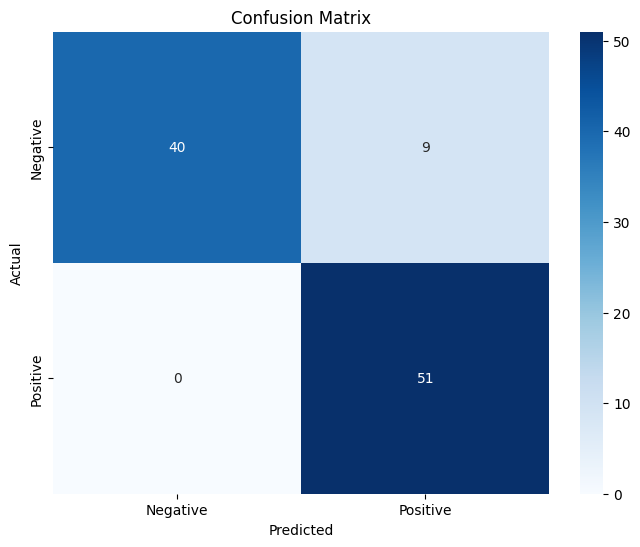

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,rfc_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [64]:
#WITHOUT PYTHON_PACKAGE
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)




In [69]:
# from DecisionTree import DecisionTree
# import numpy as np
# from collections import Counter

class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feature=None):
        self.n_trees = n_trees
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.n_features=n_feature
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                            min_samples_split=self.min_samples_split,
                            n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions

In [73]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
#print(X1_train)
#converting sparse matrix (csr_matrix) to array
X1_train = X1_train.toarray()
X1_test = X1_test.toarray()
print(X1_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [74]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

clf = RandomForest(n_trees=20)
clf.fit(X1_train, y1_train)
predictions = clf.predict(X1_test)

acc =  accuracy(predictions,y1_test)
print(acc)

0.94


Confusion Matrix:
 [[32  6]
 [ 0 62]]


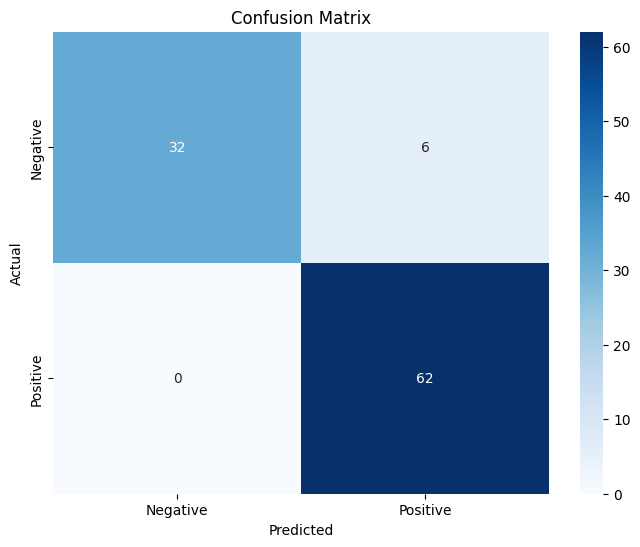

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test, predictions)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [76]:
print(predictions)

[1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1
 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0
 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1]


In [80]:
def manual_forest_prediction():
    # Taking input of any news in form of text
    X = input("ENTER A NEWS FOR PREDICTION: ")
    # Apply stemming to the input text
    X_new = stemming(X)

    # Vectorize the stemmed textvectorizer.fit(X)
    X = vectorizer.transform([X_new])
    X = X.toarray()

    # Make the prediction
    prediction = clf.predict(X)
    if (prediction==0):
     print('The news is Real '+prediction)
    else:
     print('The news is Fake',prediction)

# Example usage
manual_forest_prediction()

ENTER A NEWS FOR PREDICTION: world war 2 ended in 1945
The news is Fake [1]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y2_test, prediction2)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()